# Classification sur l'identification de la maladie

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving new_plant.csv to new_plant.csv


In [ ]:
import pandas as pd
import numpy as np

new_plant = pd.read_csv('new_plant.csv')

new_plant.head()

,Chemin,Espèce,Nom de la maladie,Statut
0,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True
1,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True
2,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True
3,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True
4,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True


In [ ]:
print("Nom des maladies :", list(new_plant['Nom de la maladie'].unique()))

Nom des maladies : ['Powdery_mildew', 'Cercospora_leaf_spot Gray_leaf_spot', 'Black_rot', 'scab', 'Common_rust_', 'Cedar_apple_rust', 'Northern_Leaf_Blight', 'Esca_(Black_Measles)', 'Early_blight', 'Bacterial_spot', 'Haunglongbing_(Citrus_greening)', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Late_blight', 'Leaf_scorch', 'Leaf_Mold', 'Spider_mites Two-spotted_spider_mite', 'Septoria_leaf_spot', 'Yellow_Leaf_Curl_Virus', 'Target_Spot', 'mosaic_virus']


In [ ]:
print("Nombre de maladies :", len(new_plant['Nom de la maladie'].unique()))

Nombre de maladies : 20


In [ ]:
# Supression des plantes saines

new_plant.dropna(inplace = True)

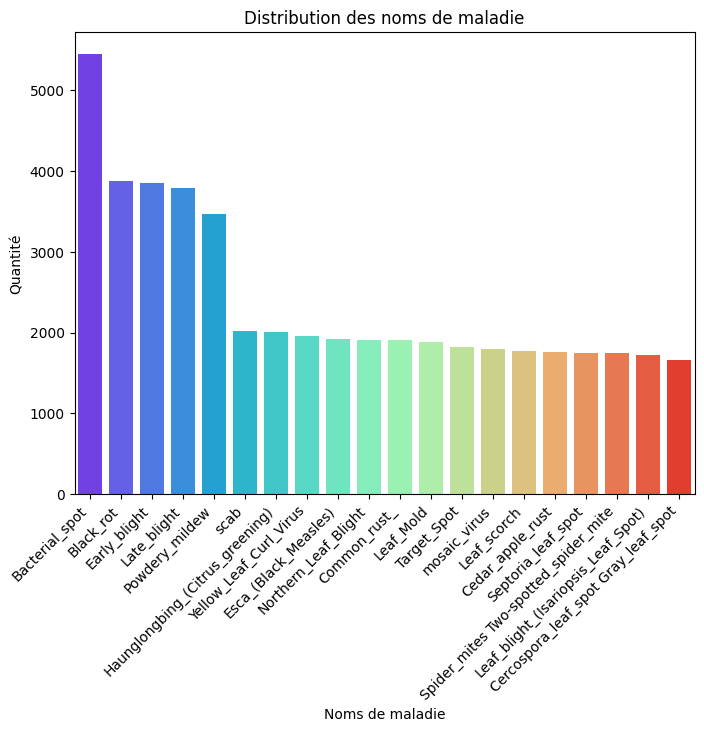

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sorted_deasies = new_plant['Nom de la maladie'].value_counts()

ax = sns.countplot(data=new_plant, x='Nom de la maladie', order=sorted_deasies.index, palette='rainbow')
plt.title("Distribution des noms de maladie")
plt.xlabel("Noms de maladie")
plt.ylabel("Quantité")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

In [ ]:
# Chemin du dossier contenant les images
image_path = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train"

# Modèle random Forest

In [ ]:
import cv2
import numpy as np

new_plant = pd.read_csv('new_plant.csv')

# Fonction qui extrait l'histogramme des images
def extract_features(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

X = []
y = []


for img_path, label in zip(new_plant['Chemin'], new_plant['Nom de la maladie']):
    img = cv2.imread(img_path)
    features = extract_features(img)
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciation du Random Forest
rf = RandomForestClassifier(n_estimators=250, random_state=42)

# Entraînement du modèle
rf.fit(X_train, y_train)

# Évaluation du modèle
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9670977828311541


In [ ]:
# Recherche des paramètres optimaux pour le Random Forest avec SearchCridCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 10, 15, 50, 100, 250],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy',verbose=40)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print("Meilleurs hyperparamètres :")
for param, value in best_params.items():
    print(f"{param}: {value}")

Meilleurs hyperparamètres :
max_features: auto
min_samples_leaf: 3
n_estimators: 250


In [ ]:

rf.fit(X_train, y_train)
rf = grid_search.best_estimator_

rf.fit(X_train, y_train)

accuracy = rf.score(X_test, y_test)
print("Précision:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.8326530612244898


In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

                                      precision    recall  f1-score   support

                      Bacterial_spot       0.95      0.95      0.95      1094
                           Black_rot       0.97      0.97      0.97       771
                    Cedar_apple_rust       0.98      0.95      0.97       366
 Cercospora_leaf_spot Gray_leaf_spot       0.97      0.98      0.98       318
                        Common_rust_       0.99      0.98      0.99       394
                        Early_blight       0.97      0.96      0.97       775
                Esca_(Black_Measles)       1.00      0.96      0.98       366
     Haunglongbing_(Citrus_greening)       0.98      0.94      0.96       411
                         Late_blight       0.96      0.95      0.96       751
                           Leaf_Mold       0.99      0.97      0.98       385
  Leaf_blight_(Isariopsis_Leaf_Spot)       0.97      0.98      0.97       340
                         Leaf_scorch       0.99      0.99      

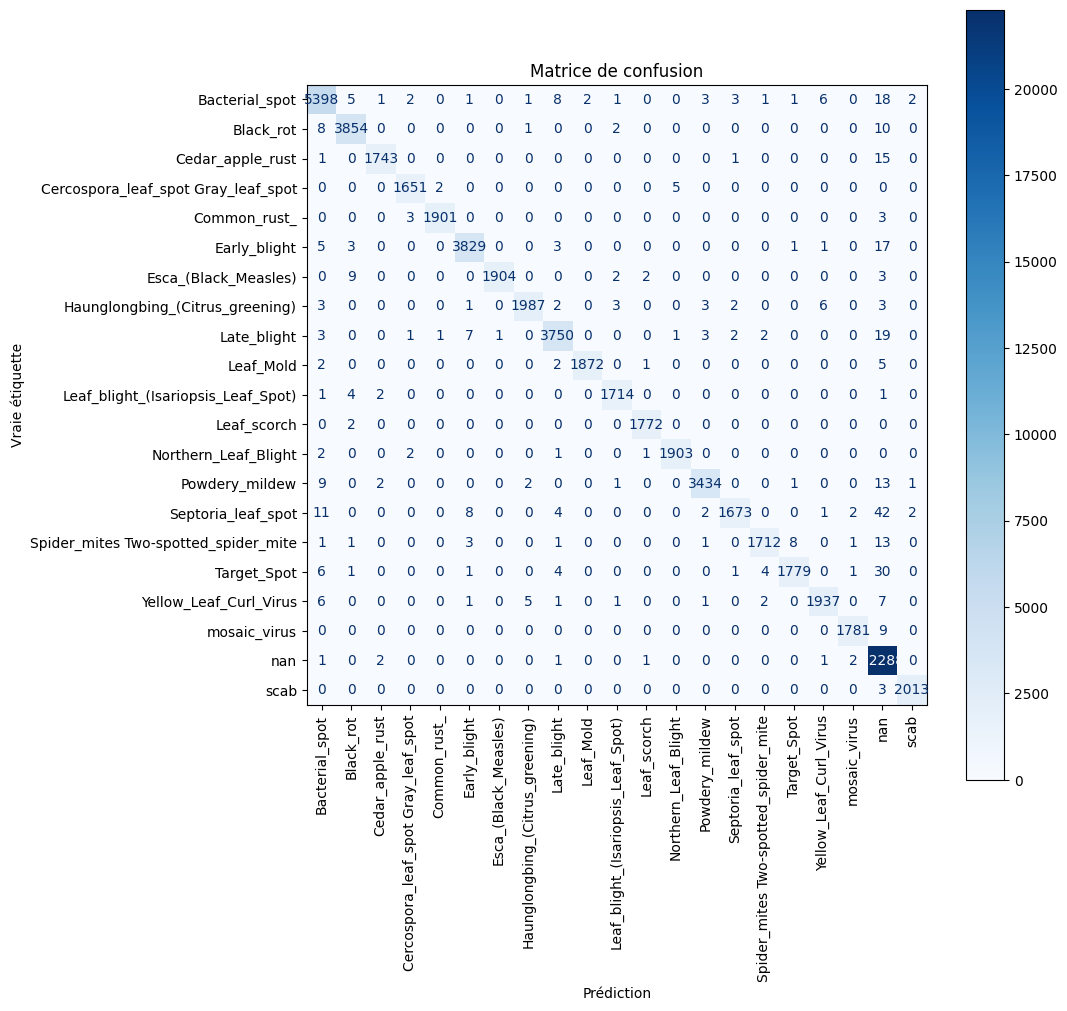

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf.predict(X)

# Calcul de la matrice de confusion
cm = confusion_matrix(y, y_pred)

labels = np.unique(y)

fig, ax = plt.subplots(figsize=(10, 10))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

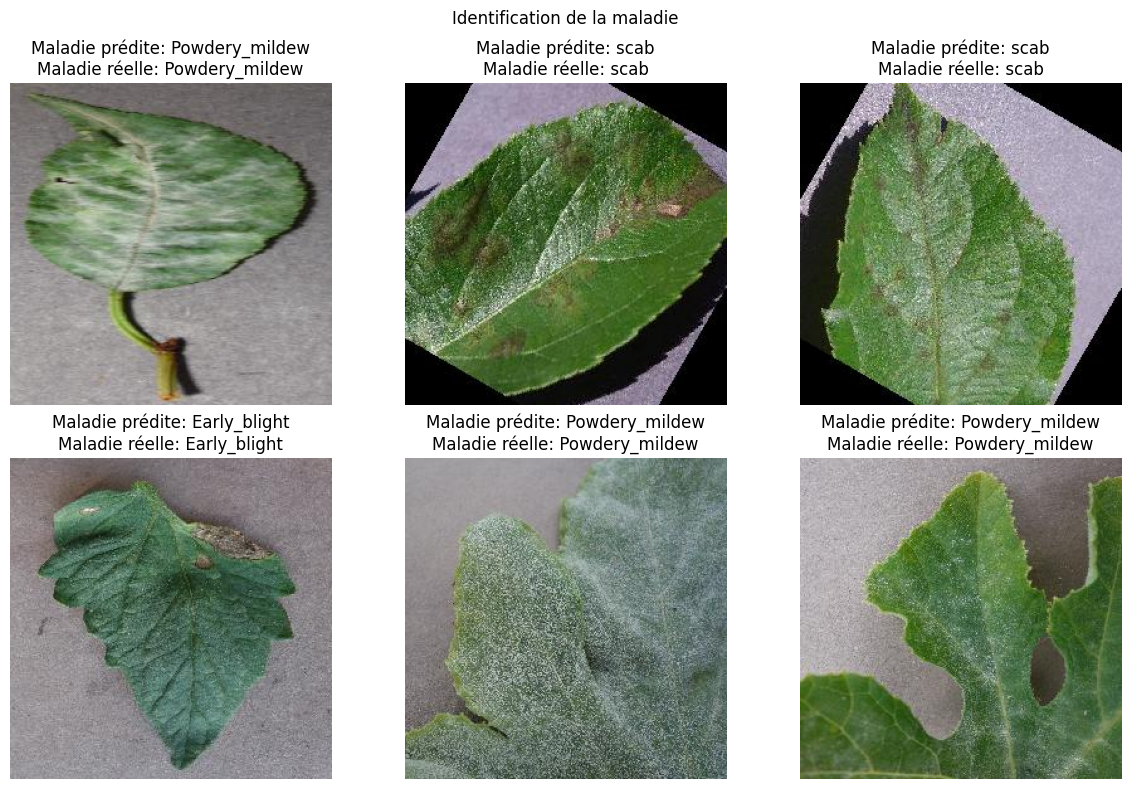

In [ ]:
import random

random_indices = random.sample(range(len(new_plant)), 6)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Identification de la maladie')

for i, idx in enumerate(random_indices):
    img_path = new_plant['Chemin'][idx]
    img = cv2.imread(img_path)

    img_features = extract_features(img)

    predicted_label = rf.predict([img_features])[0]

    true_label = new_plant['Nom de la maladie'][idx]

    row = i // 3
    col = i % 3
    axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f"Maladie prédite: {predicted_label}\nMaladie réelle: {true_label}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# # Rééchantillonnage de 30% du DataFrame initial

In [ ]:
# échantillon aléatoire en conservant les proportions
new_plant_bis = new_plant.sample(frac=0.3, replace=False, random_state=42)

display(new_plant_bis)

,Chemin,Espèce,Nom de la maladie,Statut
65017,/content/drive/MyDrive/Dataset_projet/Maladie ...,Tomato,Yellow_Leaf_Curl_Virus,True
18057,/content/drive/MyDrive/Dataset_projet/Maladie ...,Corn_(maize),NaN,False
31141,/content/drive/MyDrive/Dataset_projet/Maladie ...,Potato,NaN,False
37936,/content/drive/MyDrive/Dataset_projet/Maladie ...,Orange,Haunglongbing_(Citrus_greening),True
39633,/content/drive/MyDrive/Dataset_projet/Maladie ...,Grape,Leaf_blight_(Isariopsis_Leaf_Spot),True
...,...,...,...,...
6888,/content/drive/MyDrive/Dataset_projet/Maladie ...,Blueberry,NaN,False
54124,/content/drive/MyDrive/Dataset_projet/Maladie ...,Raspberry,NaN,False
59929,/content/drive/MyDrive/Dataset_projet/Maladie ...,Tomato,Leaf_Mold,True
13516,/content/drive/MyDrive/Dataset_projet/Maladie ...,Corn_(maize),Common_rust_,True


In [ ]:
new_plant_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21107 entries, 65017 to 3813
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Chemin             21107 non-null  object
 1   Espèce             21107 non-null  object
 2   Nom de la maladie  14433 non-null  object
 3   Statut             21107 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 680.2+ KB


In [ ]:
new_plant_bis = new_plant_bis.dropna()

In [ ]:
new_plant_bis

,Chemin,Espèce,Nom de la maladie,Statut
65017,/content/drive/MyDrive/Dataset_projet/Maladie ...,Tomato,Yellow_Leaf_Curl_Virus,True
37936,/content/drive/MyDrive/Dataset_projet/Maladie ...,Orange,Haunglongbing_(Citrus_greening),True
39633,/content/drive/MyDrive/Dataset_projet/Maladie ...,Grape,Leaf_blight_(Isariopsis_Leaf_Spot),True
23292,/content/drive/MyDrive/Dataset_projet/Maladie ...,Grape,Esca_(Black_Measles),True
48377,/content/drive/MyDrive/Dataset_projet/Maladie ...,Tomato,Early_blight,True
...,...,...,...,...
1423,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True
7745,/content/drive/MyDrive/Dataset_projet/Maladie ...,Apple,Black_rot,True
3202,/content/drive/MyDrive/Dataset_projet/Maladie ...,Corn_(maize),Cercospora_leaf_spot Gray_leaf_spot,True
59929,/content/drive/MyDrive/Dataset_projet/Maladie ...,Tomato,Leaf_Mold,True


In [ ]:
print("Nom des maladies :", list(new_plant_bis['Nom de la maladie'].unique()))

Nom des maladies : ['Yellow_Leaf_Curl_Virus', 'Haunglongbing_(Citrus_greening)', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Esca_(Black_Measles)', 'Early_blight', 'Leaf_scorch', 'Leaf_Mold', 'scab', 'Black_rot', 'Powdery_mildew', 'Septoria_leaf_spot', 'Target_Spot', 'mosaic_virus', 'Cedar_apple_rust', 'Late_blight', 'Cercospora_leaf_spot Gray_leaf_spot', 'Northern_Leaf_Blight', 'Bacterial_spot', 'Spider_mites Two-spotted_spider_mite', 'Common_rust_']


In [ ]:
print("Nombre de maladies :", len(new_plant_bis['Nom de la maladie'].unique()))

Nombre de maladies : 20


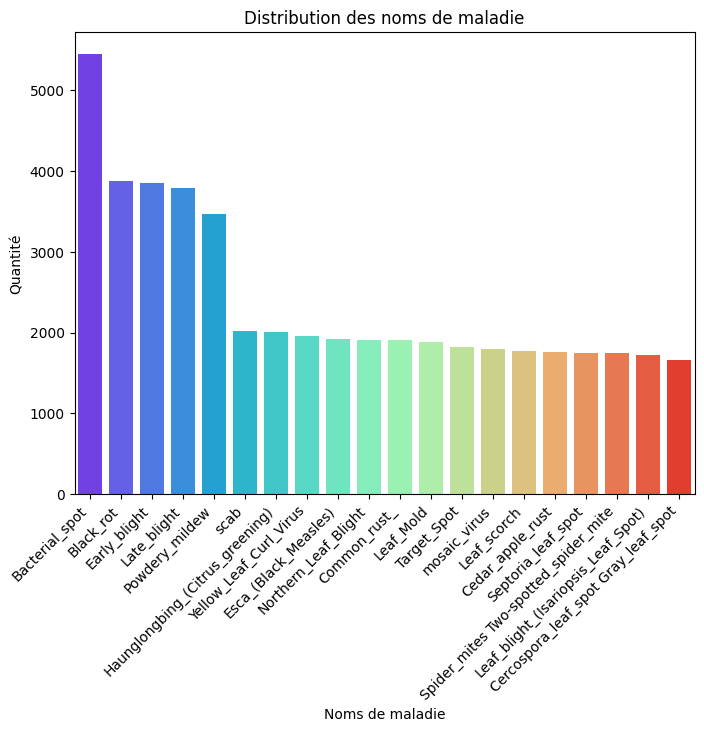

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sorted_deasies = new_plant['Nom de la maladie'].value_counts()

ax = sns.countplot(data=new_plant, x='Nom de la maladie', order=sorted_deasies.index, palette='rainbow')
plt.title("Distribution des noms de maladie")
plt.xlabel("Noms de maladie")
plt.ylabel("Quantité")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

In [ ]:
taille_classes = new_plant_bis['Nom de la maladie'].value_counts()

print(taille_classes)

Bacterial_spot                          1657
Early_blight                            1162
Black_rot                               1157
Late_blight                             1105
Powdery_mildew                          1053
Yellow_Leaf_Curl_Virus                   624
Haunglongbing_(Citrus_greening)          624
scab                                     596
Common_rust_                             586
Northern_Leaf_Blight                     556
Esca_(Black_Measles)                     555
Septoria_leaf_spot                       552
Leaf_Mold                                551
Cedar_apple_rust                         548
Target_Spot                              545
Leaf_blight_(Isariopsis_Leaf_Spot)       538
mosaic_virus                             521
Leaf_scorch                              516
Spider_mites Two-spotted_spider_mite     499
Cercospora_leaf_spot Gray_leaf_spot      488
Name: Nom de la maladie, dtype: int64


In [ ]:
import cv2
import numpy as np


# Fonction qui extrait l'histogramme des images
def extract_features(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

X = []
y = []


for img_path, label in zip(new_plant_bis['Chemin'], new_plant_bis['Nom de la maladie']):
    img = cv2.imread(img_path)
    features = extract_features(img)
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

**Modèle SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(C=10, gamma=1, kernel='rbf')

svm.fit(X_train, y_train)

accuracy = svm.score(X_test, y_test)
print("Précision:", accuracy)

Précision: 0.9054381711118809


In [ ]:
from sklearn.metrics import classification_report

y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))



                                      precision    recall  f1-score   support

                      Bacterial_spot       0.87      0.92      0.89       319
                           Black_rot       0.86      0.90      0.88       219
                    Cedar_apple_rust       0.88      0.85      0.86       124
 Cercospora_leaf_spot Gray_leaf_spot       0.85      0.84      0.85        89
                        Common_rust_       0.98      0.99      0.98       139
                        Early_blight       0.91      0.95      0.93       225
                Esca_(Black_Measles)       0.94      0.92      0.93       116
     Haunglongbing_(Citrus_greening)       0.92      0.86      0.89       131
                         Late_blight       0.84      0.83      0.83       201
                           Leaf_Mold       0.91      0.96      0.94       108
  Leaf_blight_(Isariopsis_Leaf_Spot)       0.95      0.94      0.95       120
                         Leaf_scorch       0.98      0.96      

## Rééchantillonnage : undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)

X_ru, y_ru = undersampler.fit_resample(X_train, y_train)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

svm = SVC(C= 10, gamma= 1, kernel= 'rbf')

# Entraîner le modèle sur les données d'entraînement équilibrées
svm.fit(X_ru, y_ru)

y_pred = svm.predict(X_test)

# Calculer l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle SVM : {:.2f}%".format(accuracy * 100))

Précision du modèle SVM : 87.81%


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


                                      precision    recall  f1-score   support

                      Bacterial_spot       0.88      0.83      0.86       319
                           Black_rot       0.86      0.84      0.85       219
                    Cedar_apple_rust       0.77      0.89      0.82       124
 Cercospora_leaf_spot Gray_leaf_spot       0.82      0.88      0.85        89
                        Common_rust_       0.98      0.99      0.98       139
                        Early_blight       0.90      0.87      0.88       225
                Esca_(Black_Measles)       0.90      0.93      0.92       116
     Haunglongbing_(Citrus_greening)       0.87      0.85      0.86       131
                         Late_blight       0.84      0.76      0.80       201
                           Leaf_Mold       0.88      0.98      0.93       108
  Leaf_blight_(Isariopsis_Leaf_Spot)       0.92      0.95      0.93       120
                         Leaf_scorch       0.94      0.95      

### Modèle RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Créer une instance de RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Entraîner le modèle avec les données rééquilibrées
rf.fit(X_ru, y_ru)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle RandomForest : {:.2f}%".format(accuracy * 100))

Précision du modèle RandomForest : 89.82%


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                                      precision    recall  f1-score   support

                      Bacterial_spot       0.92      0.78      0.85       319
                           Black_rot       0.89      0.88      0.88       219
                    Cedar_apple_rust       0.92      0.97      0.94       124
 Cercospora_leaf_spot Gray_leaf_spot       0.83      0.93      0.88        89
                        Common_rust_       0.99      0.99      0.99       139
                        Early_blight       0.92      0.83      0.87       225
                Esca_(Black_Measles)       0.97      0.97      0.97       116
     Haunglongbing_(Citrus_greening)       0.91      0.89      0.90       131
                         Late_blight       0.83      0.75      0.79       201
                           Leaf_Mold       0.94      0.95      0.95       108
  Leaf_blight_(Isariopsis_Leaf_Spot)       0.82      0.97      0.89       120
                         Leaf_scorch       0.98      0.96      

##Rééchantillonnage : Oversampling

*SMOTE sur modèle SVM*

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Rééchantillonnage des données avec SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{'Bacterial_spot': 1657, 'Black_rot': 1657, 'Cedar_apple_rust': 1657, 'Cercospora_leaf_spot Gray_leaf_spot': 1657, 'Common_rust_': 1657, 'Early_blight': 1657, 'Esca_(Black_Measles)': 1657, 'Haunglongbing_(Citrus_greening)': 1657, 'Late_blight': 1657, 'Leaf_Mold': 1657, 'Leaf_blight_(Isariopsis_Leaf_Spot)': 1657, 'Leaf_scorch': 1657, 'Northern_Leaf_Blight': 1657, 'Powdery_mildew': 1657, 'Septoria_leaf_spot': 1657, 'Spider_mites Two-spotted_spider_mite': 1657, 'Target_Spot': 1657, 'Yellow_Leaf_Curl_Virus': 1657, 'mosaic_virus': 1657, 'scab': 1657}


In [ ]:
svm = SVC(C= 10, gamma= 1, kernel= 'rbf')

# Entraîner le modèle sur les données d'entraînement équilibrées
svm.fit(X_resampled, y_resampled)

y_pred = svm.predict(X_test)

# Calculer l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle SVM : {:.2f}%".format(accuracy * 100))

Précision du modèle SVM : 97.99%


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                                      precision    recall  f1-score   support

                      Bacterial_spot       0.97      0.98      0.97       319
                           Black_rot       0.98      0.96      0.97       219
                    Cedar_apple_rust       0.97      0.98      0.98       124
 Cercospora_leaf_spot Gray_leaf_spot       0.99      0.98      0.98        89
                        Common_rust_       0.99      1.00      1.00       139
                        Early_blight       0.97      0.97      0.97       225
                Esca_(Black_Measles)       0.98      0.97      0.98       116
     Haunglongbing_(Citrus_greening)       0.99      0.99      0.99       131
                         Late_blight       0.96      0.94      0.95       201
                           Leaf_Mold       1.00      0.99      1.00       108
  Leaf_blight_(Isariopsis_Leaf_Spot)       0.98      0.99      0.99       120
                         Leaf_scorch       1.00      1.00      

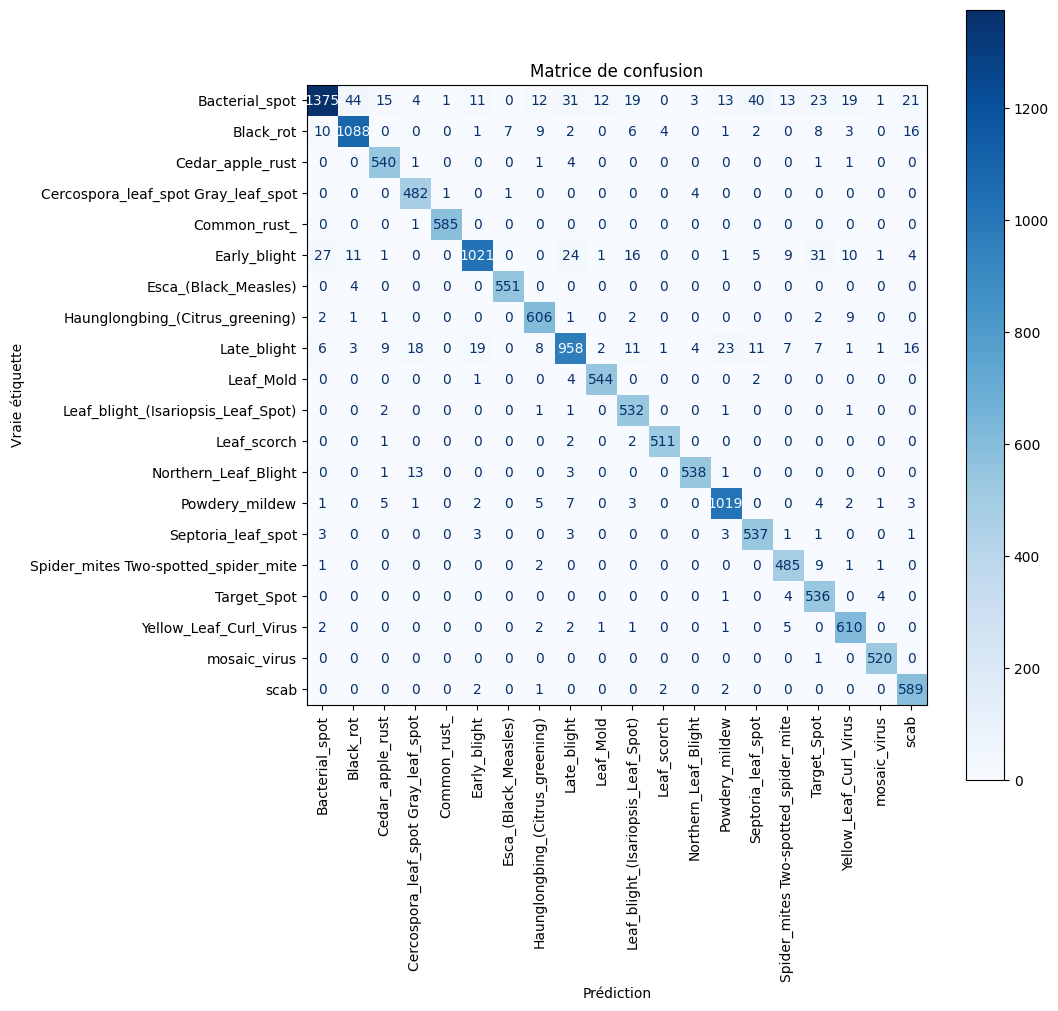

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf.predict(X)

# Calcul de la matrice de confusion
cm = confusion_matrix(y, y_pred)

labels = np.unique(y)

fig, ax = plt.subplots(figsize=(10, 10))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

*SMOTE sur modèle RandomForest*

In [ ]:
# Génération de nouvelles données avec SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Rééchantillonnage des données avec SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Affichage des tailles des classes équilibrées
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{'Bacterial_spot': 1657, 'Black_rot': 1657, 'Cedar_apple_rust': 1657, 'Cercospora_leaf_spot Gray_leaf_spot': 1657, 'Common_rust_': 1657, 'Early_blight': 1657, 'Esca_(Black_Measles)': 1657, 'Haunglongbing_(Citrus_greening)': 1657, 'Late_blight': 1657, 'Leaf_Mold': 1657, 'Leaf_blight_(Isariopsis_Leaf_Spot)': 1657, 'Leaf_scorch': 1657, 'Northern_Leaf_Blight': 1657, 'Powdery_mildew': 1657, 'Septoria_leaf_spot': 1657, 'Spider_mites Two-spotted_spider_mite': 1657, 'Target_Spot': 1657, 'Yellow_Leaf_Curl_Virus': 1657, 'mosaic_virus': 1657, 'scab': 1657}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

# Entraînement du modèle sur les données équilibrées
rf.fit(X_resampled, y_resampled)

# Évaluation
accuracy = rf.score(X_test, y_test)
print("Précision:", accuracy)

Précision: 1.0


In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

                                      precision    recall  f1-score   support

                      Bacterial_spot       1.00      1.00      1.00       319
                           Black_rot       1.00      1.00      1.00       219
                    Cedar_apple_rust       1.00      1.00      1.00       124
 Cercospora_leaf_spot Gray_leaf_spot       1.00      1.00      1.00        89
                        Common_rust_       1.00      1.00      1.00       139
                        Early_blight       1.00      1.00      1.00       225
                Esca_(Black_Measles)       1.00      1.00      1.00       116
     Haunglongbing_(Citrus_greening)       1.00      1.00      1.00       131
                         Late_blight       1.00      1.00      1.00       201
                           Leaf_Mold       1.00      1.00      1.00       108
  Leaf_blight_(Isariopsis_Leaf_Spot)       1.00      1.00      1.00       120
                         Leaf_scorch       1.00      1.00      

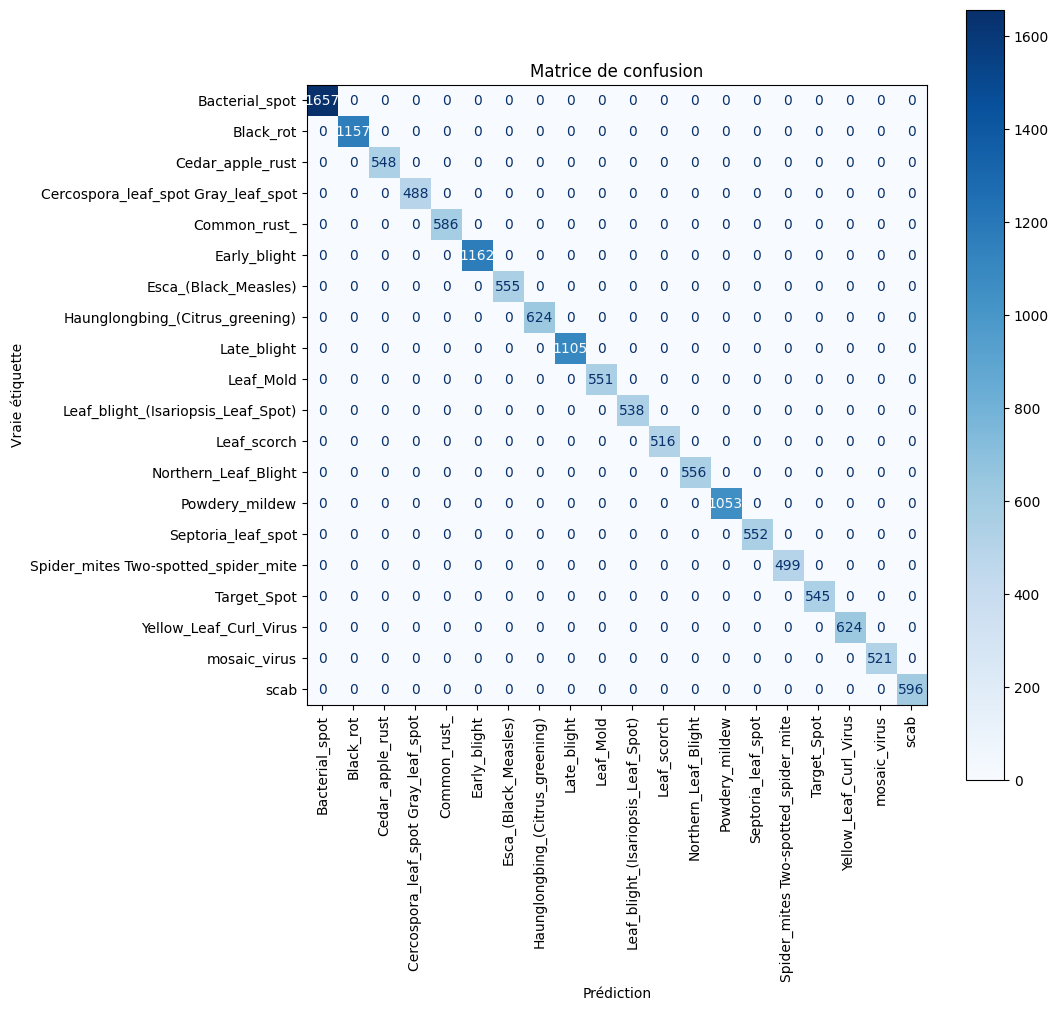

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf.predict(X)

# Calcul de la matrice de confusion
cm = confusion_matrix(y, y_pred)

labels = np.unique(y)

fig, ax = plt.subplots(figsize=(10, 10))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

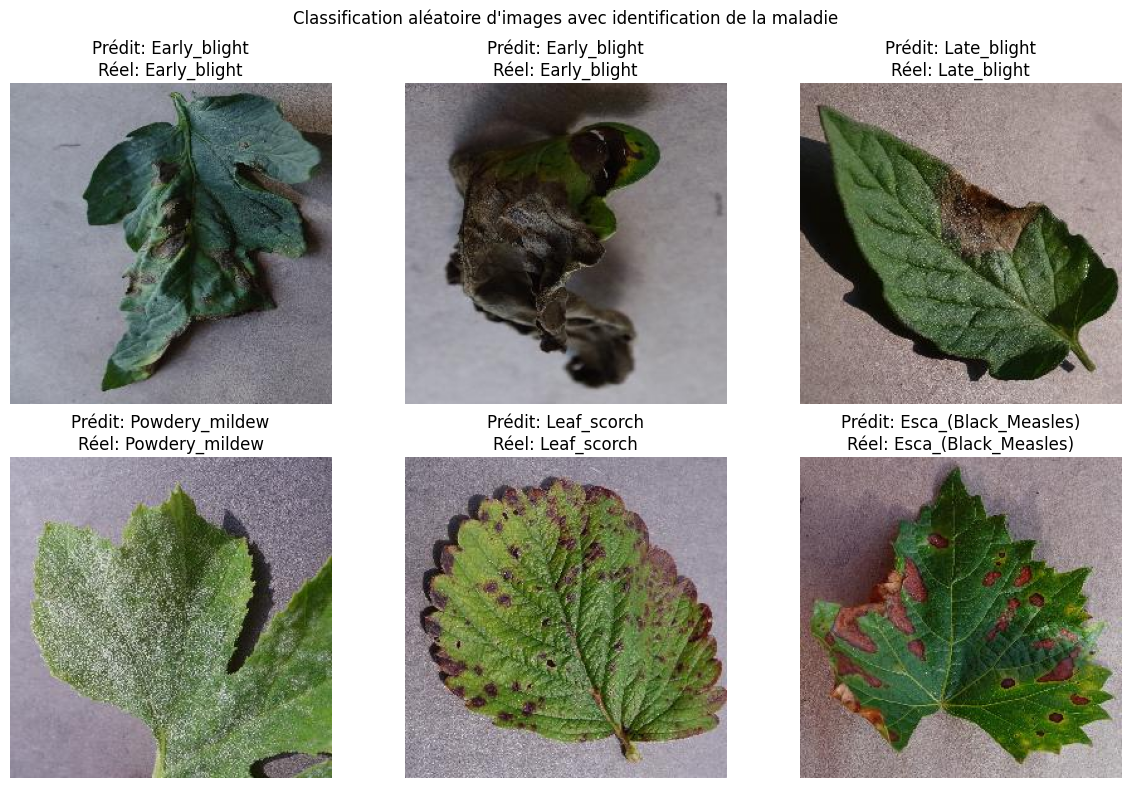

In [ ]:
import random
import matplotlib.pyplot as plt

random_indices = random.sample(list(new_plant_bis.index), min(6, len(new_plant_bis)))

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Classification aléatoire d\'images avec identification de la maladie')

for i, idx in enumerate(random_indices):
    if idx in new_plant_bis.index:
        img_path = new_plant_bis.loc[idx, 'Chemin']
        img = cv2.imread(img_path)

        img_features = extract_features(img)

        predicted_label = rf.predict([img_features])[0]

        true_label = new_plant_bis.loc[idx, 'Nom de la maladie']

        row = i // 3
        col = i % 3
        axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[row, col].set_title(f"Prédit: {predicted_label}\nRéel: {true_label}")
        axes[row, col].axis('off')

# Supprimer les sous-graphiques non utilisés
for i in range(len(random_indices), 6):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()
